In [1]:
#Import the dataset from google drive
!gdown --id '1GQ9oMf1RP_G2cgRT-8qyBSWX-51IhP6T'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GQ9oMf1RP_G2cgRT-8qyBSWX-51IhP6T
To: /content/Dataset_for_ML.csv
100% 41.9k/41.9k [00:00<00:00, 58.2MB/s]


In [2]:
#Get the data
import pandas as pd
df = pd.read_csv('/content/Dataset_for_ML.csv')
df.head()

,Unnamed: 0,Rating ?/5,Number of Ratings,Price in INR,Ram_size,Storage_size,Battery_size,Company_name,Company_name.1
0,0,4.2,33561,5649,2.0,32.0,5000.0,12,12
1,1,4.2,77128,11999,4.0,64.0,5000.0,12,12
2,2,4.3,15175,6999,4.0,64.0,5000.0,12,12
3,3,4.2,22621,7749,4.0,64.0,5000.0,12,12
4,4,4.3,15175,6999,4.0,64.0,5000.0,12,12


In [3]:
df.drop(['Unnamed: 0','Company_name.1'],axis=1,inplace=True)

<Axes: >

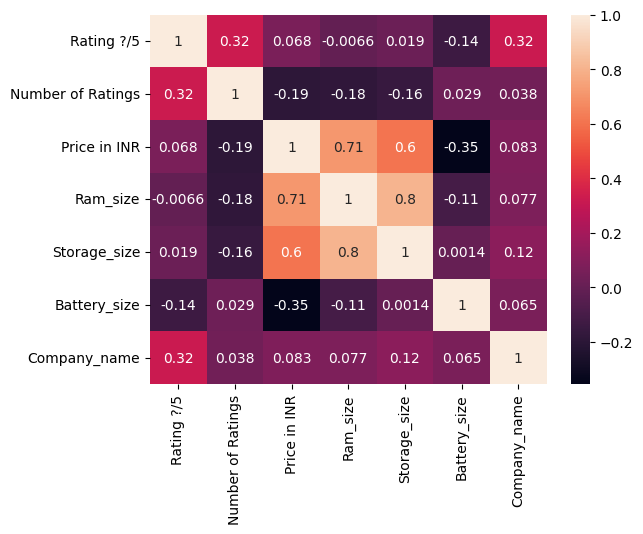

In [4]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [5]:
#We need to drop Rating columns
df1= df.copy()
#df1.drop(['Number of Ratings','Rating ?/5','Company_name'],axis=1,inplace=True)

### Divide the data into dependent and independent

In [6]:
x = df1.drop(['Price in INR'],axis=1)
y = df1.iloc[:,2:3]

In [7]:
x

,Rating ?/5,Number of Ratings,Ram_size,Storage_size,Battery_size,Company_name
0,4.2,33561,2.0,32.0,5000.0,12
1,4.2,77128,4.0,64.0,5000.0,12
2,4.3,15175,4.0,64.0,5000.0,12
3,4.2,22621,4.0,64.0,5000.0,12
4,4.3,15175,4.0,64.0,5000.0,12
...,...,...,...,...,...,...
1015,4.3,25582,4.0,64.0,5000.0,3
1016,4.3,25582,4.0,64.0,5000.0,3
1017,4.3,25582,4.0,64.0,5000.0,3
1018,4.2,7117,8.0,128.0,4500.0,3


In [8]:
y

,Price in INR
0,5649
1,11999
2,6999
3,7749
4,6999
...,...
1015,14999
1016,14999
1017,14999
1018,18999


In [9]:
# split it into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42, shuffle= True)

print("Length of X_train ",len(x_train)," Length of y_train ",len(y_train))
print("Length of X_test ",len(x_test),"Length of y_test ",len(y_test))

Length of X_train  714  Length of y_train  714
Length of X_test  306 Length of y_test  306


In [10]:
#Standardisation of the data because the data is not performing best
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
y_train_ss = ss.fit_transform(y_train)
x_test_ss = ss.fit_transform(x_test)
y_test_ss = ss.fit_transform(y_test)

In [11]:
x_train_ss.std()

1.0

In [12]:
x_train_ss.mean()

-8.87349121455774e-16

In [13]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("The model accuracy is: ",lr.score(x_test,y_test))


#Applying Linear Regression on StandarData
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_ss, y_train_ss)
print("The model accuracy of StandarData: ",lr.score(x_test_ss,y_test_ss))

The model accuracy is:  0.591912825596622
The model accuracy of StandarData:  0.5918662616013001


In [14]:
# Applying SVM regressor
from sklearn.svm import SVR
svr = SVR(kernel = 'linear', degree = 3)
svr.fit(x_train,y_train)
print("SVM model accuracy: ",svr.score(x_test,y_test))



# Applying SVM regressor on StandardData
from sklearn.svm import SVR
svr = SVR(kernel = 'linear', degree = 3)
svr.fit(x_train_ss,y_train_ss)
print("SVM model accuracy of StandardData: ",svr.score(x_test_ss,y_test_ss))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVM model accuracy:  0.5062277370416356
SVM model accuracy of StandardData:  0.5789142201371759


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
#Applying Decission Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3
                           , max_leaf_nodes =7)
dt.fit(x_train,y_train)
print("Decision Tree Accuracy: ",dt.score(x_test,y_test))


#Applying Decission Tree on StandardData
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 3
                           , max_leaf_nodes =7)
dt.fit(x_train_ss,y_train_ss)
print("Decision Tree Accuracy of StandardData: ",dt.score(x_test_ss,y_test_ss))

Decision Tree Accuracy:  0.629633577002368
Decision Tree Accuracy of StandardData:  0.6395343085336135


[Text(655.7692307692307, 539.0, 'X[2] <= -0.242\nmse = 1.0\nsamples = 714\nvalue = 0.0'),
 Text(238.46153846153845, 385.0, 'X[4] <= -2.516\nmse = 0.247\nsamples = 317\nvalue = -0.714'),
 Text(119.23076923076923, 231.0, 'mse = 1.373\nsamples = 8\nvalue = 1.032'),
 Text(357.6923076923077, 231.0, 'X[2] <= -0.999\nmse = 0.136\nsamples = 309\nvalue = -0.76'),
 Text(238.46153846153845, 77.0, 'mse = 0.066\nsamples = 118\nvalue = -1.014'),
 Text(476.9230769230769, 77.0, 'mse = 0.115\nsamples = 191\nvalue = -0.602'),
 Text(1073.076923076923, 385.0, 'X[4] <= 0.138\nmse = 0.869\nsamples = 397\nvalue = 0.57'),
 Text(834.6153846153845, 231.0, 'X[1] <= -0.385\nmse = 0.693\nsamples = 143\nvalue = 1.212'),
 Text(715.3846153846154, 77.0, 'mse = 0.595\nsamples = 90\nvalue = 1.45'),
 Text(953.8461538461538, 77.0, 'mse = 0.6\nsamples = 53\nvalue = 0.807'),
 Text(1311.5384615384614, 231.0, 'X[1] <= -0.688\nmse = 0.606\nsamples = 254\nvalue = 0.21'),
 Text(1192.3076923076924, 77.0, 'mse = 0.835\nsamples = 7

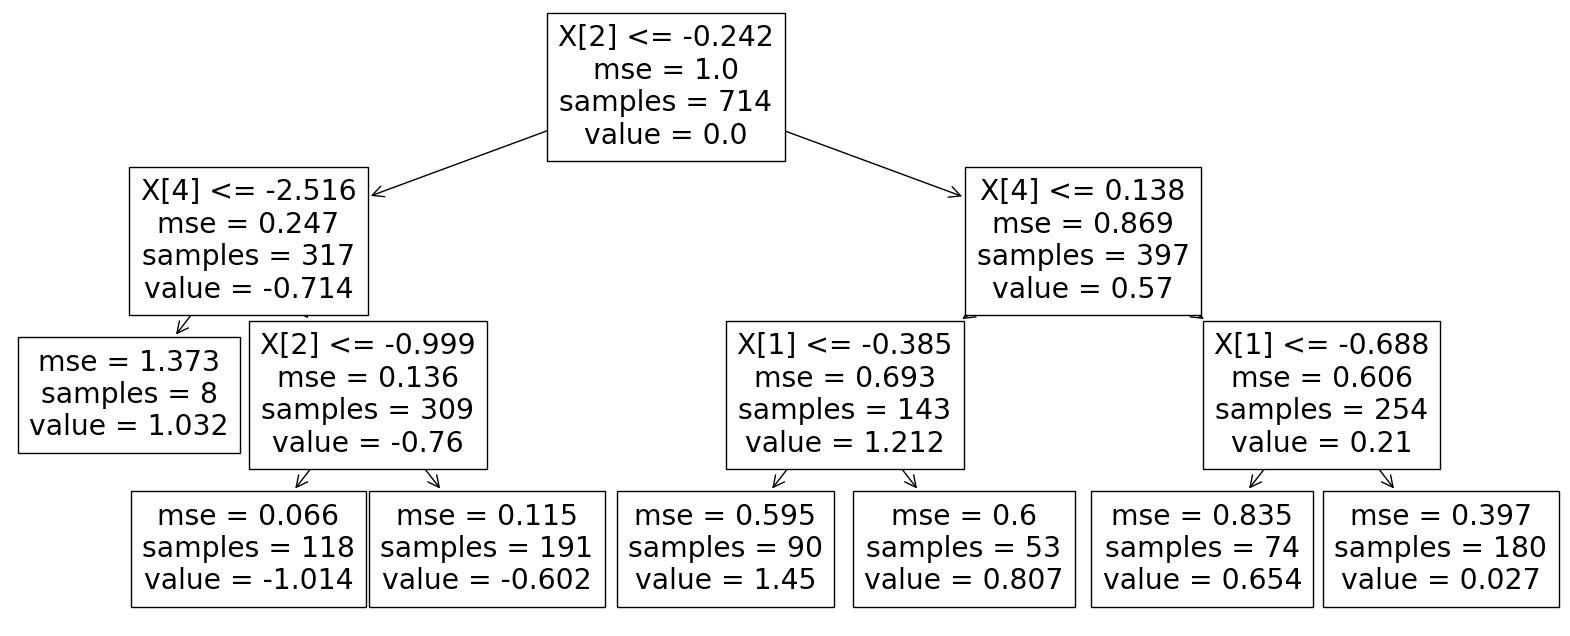

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
from sklearn import tree
tree.plot_tree(dt)

In [17]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1,
                          leaf_size = 30)
knn.fit(x_train,y_train)
print("The Accuracy of the KNN is: ",knn.score(x_test,y_test))

The Accuracy of the KNN is:  0.6430476659698452


### Ensemble techniques

In [18]:
#Applying Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth = 10, max_leaf_nodes = 9, verbose=0)
rfr.fit(x_train,y_train)
print("The accuracy of the Random Forest is: ",rfr.score(x_test,y_test))

The accuracy of the Random Forest is:  0.6718250053084074


<ipython-input-18-50f2c6c0d689>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


In [19]:
#Adaboost
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=50,
                        learning_rate = 0.1)
abr.fit(x_train,y_train)
print("Accuracy for Adaboost is: ",abr.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy for Adaboost is:  0.641984353127943


In [20]:
#GradientBoost
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate = 0.1,
                                n_estimators = 200,
                                max_depth=3)
gbr.fit(x_train,y_train)
print("Accuracy of Gradient Boost is: ",gbr.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Gradient Boost is:  0.8247272552418851


In [46]:
#XGBoost
import xgboost
xg = xgboost.XGBRegressor(max_depth = 10, learning_rate = 0.1, n_estimators=100)
xg.fit(x_train,y_train)
xg.score(x_test,y_test)

0.8755783993786631

### AutoML

In [23]:
!pip install h5py
!pip install typing-extensions
!pip install wheel
!pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 39.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 38.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 88.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.5 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641946 sha256=cffdf4159d6154010eea6f92bd8ec5

In [22]:
import autosklearn.regression

autosklearn_regressor= autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=240,
    per_run_time_limit=60,
)

autosklearn_regressor.fit(x_train,y_train)

autosklearn_regressor.score(x_test,y_test)

0.8110609370456968

In [23]:
print(autosklearn_regressor.leaderboard())

          rank  ensemble_weight              type      cost   duration
model_id                                                              
17           1             0.66       extra_trees  0.196486   3.703923
2            2             0.26     random_forest  0.207331   1.820055
9            3             0.06  gaussian_process  0.320013  14.521956
28           4             0.02               mlp  0.392153   2.397871


### Deep Learning

In [38]:
#ANN
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu', input_shape=(6,)))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))


#compile
model.compile(optimizer='adam', loss='mse', metrics= ['accuracy'])

#Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
23/23 [==============================] - 2s 3ms/step - loss: 302493120.0000 - accuracy: 0.0000e+00
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 265451872.0000 - accuracy: 0.0000e+00
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 254110336.0000 - accuracy: 0.0000e+00
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 244325504.0000 - accuracy: 0.0000e+00
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 232167952.0000 - accuracy: 0.0000e+00
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 217967760.0000 - accuracy: 0.0000e+00
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 203080688.0000 - accuracy: 0.0000e+00
Epoch 8/10
23/23 [==============================] - 0s 3ms/step - loss: 185655360.0000 - accuracy: 0.0000e+00
Epoch 9/10
23/23 [==============================] - 0s 3ms/step - loss: 165667456.0000 - accuracy: 0.0000e+00
Epoch 10/1

### The data is not so much complex that is why it is perfoming poor on this dataset.

## Now we know that XGBoost is performing better than any other model so we will take this model for further predictions. But first of all we will try the HyperParameter Tuning for any improvement.

In [53]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': [5,10,15,20,25,30],
                  'n_estimators': [50,100,200],
                  'learning_rate': [0.01,0.1,1,0.001]
                  }]

clf = GridSearchCV(xg, forest_params, cv = 5, return_train_score=False)

clf.fit(x_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.12250652, 0.20182967, 0.12446079, 0.0379539 , 0.08224216,
        0.20236578, 0.04076133, 0.08142915, 0.21879349, 0.03650517,
        0.55764589, 0.22151518, 0.03796062, 0.08435125, 0.21765981,
        0.03721514, 0.08686371, 0.22103057, 0.03507123, 0.05943708,
        0.11371722, 0.05908971, 0.11742053, 0.22751856, 0.07945375,
        0.18433385, 0.87526193, 0.0895225 , 0.20798836, 0.45618348,
        0.09468093, 0.20779958, 0.46215467, 0.09569697, 0.69726963,
        0.462924  , 0.03624034, 0.06090598, 0.11615152, 0.06428423,
        0.08379803, 0.12368741, 0.06422777, 0.07744794, 0.10154228,
        0.06659884, 0.07968435, 0.11165318, 0.07003675, 0.083108  ,
        0.12087946, 0.08214331, 0.54060025, 0.10965896, 0.03174806,
        0.05687742, 0.11089573, 0.03285761, 0.06245322, 0.12461152,
        0.03271008, 0.06300535, 0.12092338, 0.03254576, 0.06456704,
        0.11795292, 0.0338871 , 0.06117654, 0.1183713 , 0.03586483,
        0.0591588 , 0.11743526]

In [57]:
grid_df = pd.DataFrame(clf.cv_results_)
grid_df.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.122507,0.084594,0.005941,0.000861,0.01,5,50,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-1.203247,-1.144319,-1.179722,-1.580488,-1.271530,-1.275861,0.157883,49
1,0.201830,0.196748,0.008471,0.005798,0.01,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-0.050803,0.037940,-0.020691,-0.133893,-0.102297,-0.053949,0.060478,43


In [63]:
grid_df[['param_learning_rate','param_max_depth','param_n_estimators','mean_test_score']].sort_values('mean_test_score',ascending=False)

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score
20,0.1,5,200,0.825949
32,0.1,25,200,0.825859
31,0.1,25,100,0.825840
35,0.1,30,200,0.825786
34,0.1,30,100,0.825777
...,...,...,...,...
63,0.001,20,50,-4.050570
66,0.001,25,50,-4.050570
69,0.001,30,50,-4.050570
60,0.001,15,50,-4.050570


In [65]:
print(clf.best_params_)
print(clf.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.825949474069027


### WE already got pretty much high accuracy with n_estimators=100 which is 87% so we will continue with the same parameters.

In [66]:
#Save the model
import pickle
pickle.dump(xg, open('FlipCart_mobile_model(XG).pkl', 'wb'))

In [73]:
pickled_model = pickle.load(open('FlipCart_mobile_model(XG).pkl', 'rb'))
import numpy as np
values = np.array([[4.2,	33561, 2.0,	32.0,	5000.0,	12]])
pickled_model.predict(values)

array([5709.853], dtype=float32)

### The main value is 5649 and it predict the value as 5709 which pretty much accurate.

In [69]:
df.head(1)

,Rating ?/5,Number of Ratings,Price in INR,Ram_size,Storage_size,Battery_size,Company_name
0,4.2,33561,5649,2.0,32.0,5000.0,12
